In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [29]:
mnist = tf.keras.datasets.mnist #28 28 images 

(x_train, y_train), (x_test , y_test) = mnist.load_data()

In [27]:

#normalize data
x_train = tf.keras.utils.normalize(x_train, axis=1)



model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
#for ten numbers we use 10 dense, for probability the dense use softmax
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
            )

model.fit(x_train,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 17s 8ms/step - loss: 0.2662 - accuracy: 0.9230
Epoch 2/3
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1107 - accuracy: 0.9658
Epoch 3/3
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0760 - accuracy: 0.9757


In [30]:
x_test = tf.keras.utils.normalize(x_test, axis=1)
val_loss, vall_acc = model.evaluate(x_test,y_test)


313/313 [==============================] - 2s 5ms/step - loss: 0.0923 - accuracy: 0.9730


In [31]:
model.save('epic_num_reader.model')

INFO:tensorflow:Assets written to: epic_num_reader.model\assets


INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [33]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [38]:
predictions = new_model.predict([x_test])
#return probability for 10 numbers 
print(len(predictions[1])) 
print(predictions[1]) 


313/313 [==============================] - 2s 5ms/step
10
[1.3953193e-07 1.7487256e-02 9.7887349e-01 3.4002035e-03 1.1177191e-07
 1.0906488e-04 2.2386845e-05 1.7068980e-07 1.0723737e-04 1.5181138e-08]


In [45]:
import numpy as np

#for all test data predict result

##for i in range (len(predictions)):
    ##print(np.argmax(predictions[i]))

print(np.argmax(predictions[0]))

7


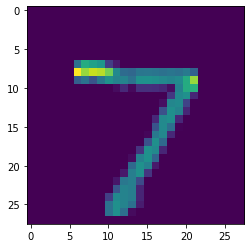

In [43]:
plt.imshow(x_test[0]) # model  make true predict